In [1]:
# Import required libraries
import pandas as pd
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt

# Create connection
engine = create_engine('sqlite:///test_base.db')

In [3]:
# Query 1: Show all data
with engine.connect() as conn:
    df_all = pd.read_sql_query(text("SELECT * FROM inspection_checklists"), conn)
print("Total rows:", len(df_all))
display(df_all)

Total rows: 550


,report_id,item_category,item_number,no,check_item,result
0,1,Tower base,1,1,Carrying out a visual inspection of the tower ...,1 Done - No defects
1,1,Tower base,1,2,Checking RCD tower base,1 Done - No defects
2,1,Tower,2,3,Visually inspecting the tower,1 Done - No defects
3,1,Machine house,3,4,Checking the machine house first aid kit,1 Done - No defects
4,1,Machine house,3,5,Checking the fire extinguisher in the machine ...,1 Done - No defects
...,...,...,...,...,...,...
545,4,Report overview,26,173,"rotor system - central lubrication, pressure g...","special, grease system - not working"
546,4,Report overview,26,175,"main component, screwing - Hub adapter – blade...",fit/gap size - wrong alignment
547,4,Report overview,26,176,"main component, screwing - rotor hub - blade f...",fit/gap size - wrong alignment
548,4,Report overview,26,177,"main component, screwing - rotor hub - blade f...",fit/gap size - wrong alignment


In [4]:
# Query 2: Show only Report overview items
with engine.connect() as conn:
    df_overview = pd.read_sql_query(
        text("SELECT * FROM inspection_checklists WHERE item_category = 'Report overview'"),
        conn
    )
display(df_overview)

,report_id,item_category,item_number,no,check_item,result
0,1,Report overview,7,13,Blade tip - Blade tip\n,"Erosion - Bladecoat porous, flaking\n20-50mm"
1,3,Report overview,27,57,"tower, entrance area - lighting, entrance inside","special, lighting - illuminant defect"
2,4,Report overview,26,2,"tower, tower base - Cabinet, control cabinet i...","special, control system - Software\nversion in..."
3,4,Report overview,26,39,"tower, tower base - cabinet, lighting","special, electrical component - battery discha..."
4,4,Report overview,26,57,"blade system A - cabinet, capacitor",testing/safety - label/sign missing
5,4,Report overview,26,63,rotor system - slip ring unit,"special, sealing - sealing missing"
6,4,Report overview,26,96,"tower, tower base - fire extinguisher","material, plastic - crack"
7,4,Report overview,26,96,"tower, tower base - fire extinguisher",testing/safety - inspection date missing/exceeded
8,4,Report overview,26,97,"outside, concrete tower - concrete body","material, concrete / mortar - crack vertical"
9,4,Report overview,26,97,"inside, concrete tower - concrete body","material, concrete / mortar - crack vertical"


In [6]:
# Query 3: Show Report overview for report_id 2
with engine.connect() as conn:
    df_overview_3 = pd.read_sql_query(
        text("SELECT * FROM inspection_checklists WHERE item_category = 'Report overview' AND report_id = 3"),
        conn
    )
display(df_overview_3)

,report_id,item_category,item_number,no,check_item,result
0,3,Report overview,27,57,"tower, entrance area - lighting, entrance inside","special, lighting - illuminant defect"


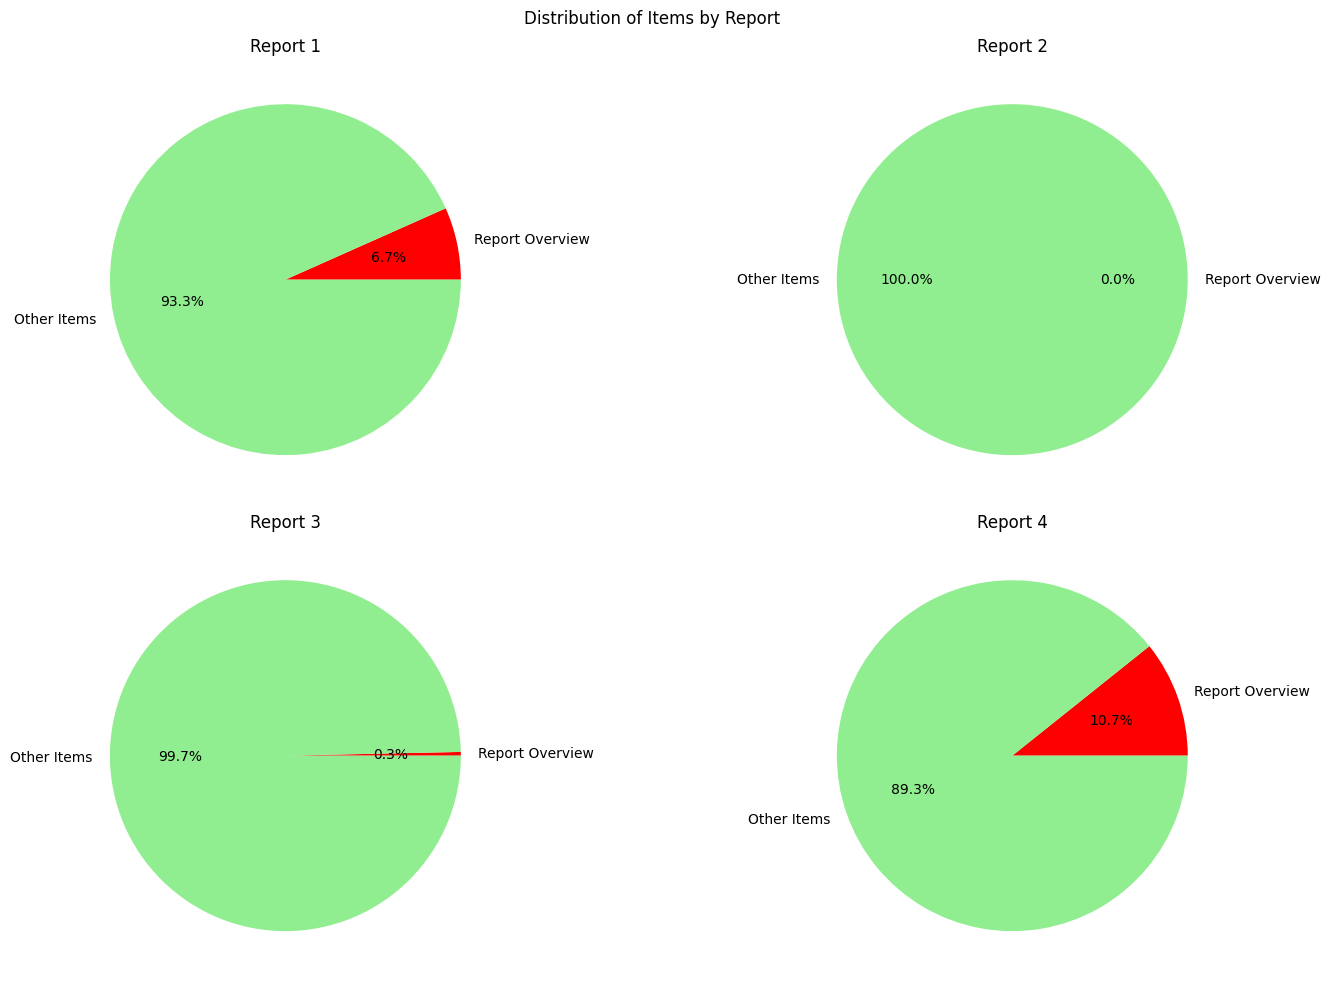

In [10]:
# Query 5: Calculate and plot percentages
with engine.connect() as conn:
    df_percentages = pd.read_sql_query(
        text("""
            WITH all_reports AS (
                SELECT DISTINCT report_id FROM inspection_checklists
            ),
            overview_counts AS (
                SELECT report_id, COUNT(*) as overview_count
                FROM inspection_checklists 
                WHERE item_category = 'Report overview'
                GROUP BY report_id
            ),
            total_counts AS (
                SELECT report_id, COUNT(*) as total_count
                FROM inspection_checklists 
                GROUP BY report_id
            )
            SELECT a.report_id, 
                   COALESCE(o.overview_count, 0) as overview_count,
                   t.total_count - COALESCE(o.overview_count, 0) as other_count
            FROM all_reports a
            LEFT JOIN overview_counts o ON a.report_id = o.report_id
            JOIN total_counts t ON a.report_id = t.report_id
            ORDER BY a.report_id
        """),
        conn
    )

# Create pie charts in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
colors = ['red', '#90EE90']  # Red for Overview, Light green for Others

for idx, row in df_percentages.iterrows():
    row_idx = idx // 2
    col_idx = idx % 2
    
    labels = ['Report Overview', 'Other Items']
    sizes = [row['overview_count'], row['other_count']]
    
    axes[row_idx, col_idx].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
    axes[row_idx, col_idx].set_title(f'Report {row["report_id"]}')

plt.suptitle('Distribution of Items by Report')
plt.tight_layout()
plt.show()